# Hypothesis Testing Exercises

In [2]:
import math
import env
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data

In [154]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

sns.set(rc={'figure.figsize': (16,9),
            'font.size': 16})

## Hypothesis Testing: A Simulation Based Approach
__Example__: Codeup produced a scratch off lottery ticket called "Golden Gitty-Up". The odds of winning are advertised to the state of Texas.
> If Codeup produced the tickets they know how many tickets are 'winners' and how many are 'losers'

__Theory__: Our `population` is 1,000 tickets.

__Implementation__: Model the win/loss ratio using pandas Series
- 250 tickets -> Win
- 750 tickets -> Loss
- 25% chance of a 'Win' ticket
- 1 in 4 chance of a 'Win' ticket

### Probability of Win/Lose

The actual probability of winning is 25%


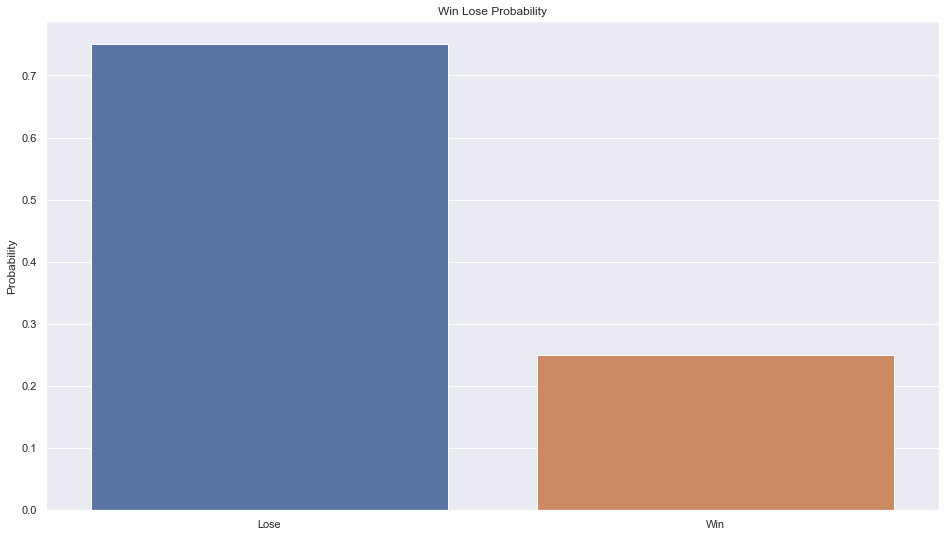

In [3]:
# Generate a series of 1000 True/False values to represent the Golden Gitty-Up
# win-loss probability.
tickets = pd.Series([True] * 250 + [False] * 750)


print('The actual probability of winning is {:.0%}'.format(tickets.mean()))

# Visualize the win loss probability.
sns.barplot(y=tickets.value_counts(normalize=True), x=['Lose', 'Win'])

# Format chart with labels.
plt.title('Win Lose Probability')
plt.ylabel('Probability');

### Create a Sample

__Scenario__:

The "Golden Gitty-Ups" were distributed to the town of Bronte, Texas, population 999. Jack Kerouac is dropped into town, receiving the last ticket.

__Theory__:

Take a random `sample` [__BORING__ Google Talk] and calculate the win rate.
> We won't see a win-rate of exactly 25% for each sample. A sample is a piece of the population. A piece of the glory.

__Implementation__:

Use `pd.sample` to randomly choose 25 tickets, representing 25 Brontenites. Use `pd.mean` to calculate win rate of the sample.

In [4]:
# A sample of the population is 25 out of 1,000 citizens.
citizens = 25
sample_mean = tickets.sample(citizens).mean()

print("Sample mean win-rate {:.2%}".format(sample_mean))

Sample mean win-rate 24.00%


### Generating Random Samples
__Scenario__:

Each citizen in Bronte, Texas in is given a "Golden Gitty-Up".

__Theory__:

Each street is a portion of the population, 25 citizens each. The win rate, again, will not be exactly 25%.

__Implementation__:

Let's take a sample of one street.

In [5]:
# this is a list comprehension that takes 5 random samples of 25 tickets.
[tickets.sample(citizens).mean() for _ in range(5)]

[0.16, 0.4, 0.08, 0.24, 0.36]

### Simulate $n$ Samples
__Theory__:

Let's repeat this experiment 10,000 times.
> Win rates are expected to be normally distributed.

__Implementation__:

Simulate 10,000 win-loss probabilities of a sample of our population.

Average win-loss probability of 10,000 samples is 24.93%


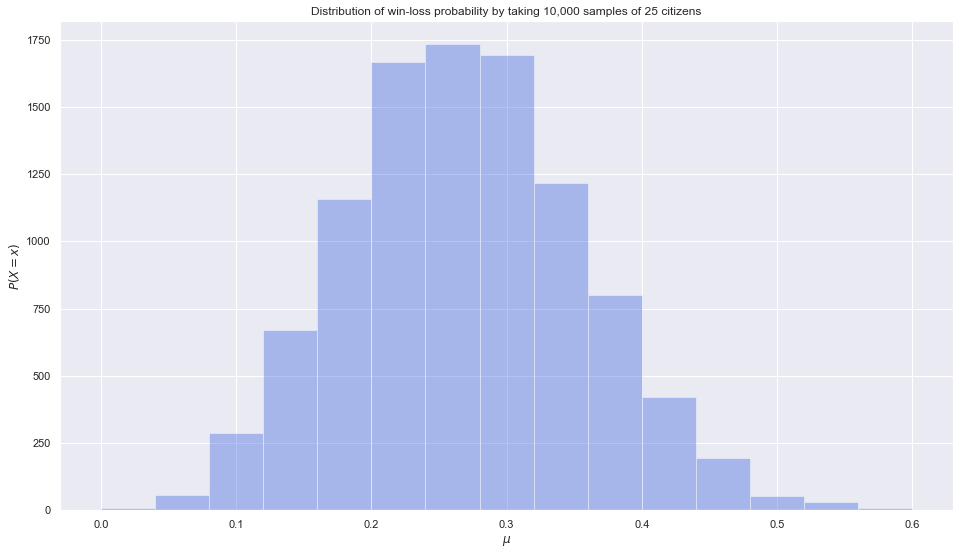

In [6]:
# Use `stats.binom` to simulate wins as 1 and losses as 0.
# Set `p` kwarg to .25 -> The probability of winning.
win_loss_rates = stats.binom(n=1, p= 0.25).rvs((10_000, 25)) # 25 citizens per sample
average_win_rate = win_loss_rates.mean()

# Answer:
print("Average win-loss probability of 10,000 samples is {:.2%}".format(average_win_rate))

# Calculate and plot the mean win rate for 10,000 trials.
sns.distplot(win_loss_rates.mean(axis=1),
             bins=15,
             kde=False,
             color='Royalblue')

# Chart labels to describe the data.
plt.title("Distribution of win-loss probability by taking 10,000 samples of 25 citizens")
plt.xlabel('$\mu$')
plt.ylabel('$P(X=x)$');

In [7]:
# simulation of 10,000 win-loss probabilities

# Inside pd.Series, tickets.sample(citizens).mean() calculates the mean win rate of a single
# sample/simulation. 'for _ in range(10_000)' simulates 10,000 samples of a street's win-rate.
# calculated_winrates = pd.Series([tickets.sample(citizens).mean() for _ in range(10_000)])

# sns.distplot(calculated_winrates,bins=15)
# plt.title("Win-rate distribution of taking 10,000 samples from 25 citizens");

# Central Limit Theory Exercise

__Theory__:

The __Central Limit Theorem__ will be normally distributed even if the underlying random variable __*is not*__.

## 1.
>Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.

In [8]:
# In order to create a matrix of all possible outcomes from rolling a pair of dice
# I'll need to use Numpy and broadcast the combinations into a matrix.
die_1 = np.array([1,2,3,4,5,6]).reshape(-1, 1) # reshape
die_2 = np.array([1,2,3,4,5,6])

# Add vectors together to generate a Numpy array.
dice = die_1 + die_2
number_of_outcomes = 36  # Number of outcomes from rolling a pair of dice.

# Calculate the expected mean value.
expected_value = (dice / number_of_outcomes).sum()

# Answer:
print("Expected mean value of 6 dice rolls is {:.2f}".format(
    expected_value)
     )

Expected mean value of 6 dice rolls is 7.00


In [9]:
# Create a pandas dataframe to relabel index and columns as sides of a die
dice_outcomes = pd.DataFrame(
    dice,
    index=np.arange(1,7),
    columns=np.arange(1,7)
)

print("\nAll possible outcomes of rolling a pair of dice:")
dice_outcomes


All possible outcomes of rolling a pair of dice:


,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [10]:
# Create a probability table of rolling a certain outcome
dice_probability = pd.DataFrame(
    dice_outcomes.stack().value_counts().sort_index(),
    columns = ['#_of_possible_outcomes']
).rename_axis(index='outcome')

# Create a new column with the probability of a certain outcome
dice_probability['probability'] = dice_probability / 36

# Display dice data
print("\nProbabilities of rolling a certain value:")
round(dice_probability, 3)  # I guess 7's are 'lucky'...


Probabilities of rolling a certain value:


,#_of_possible_outcomes,probability
outcome,,
2,1,0.028
3,2,0.056
4,3,0.083
5,4,0.111
6,5,0.139
7,6,0.167
8,5,0.139
9,4,0.111
10,3,0.083


It's normally distributed!


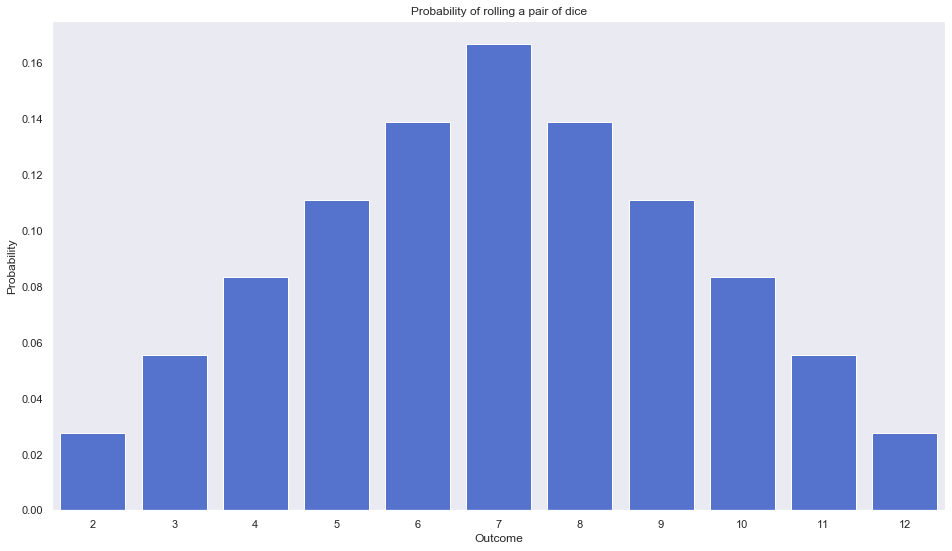

In [11]:
# Answer:
print("It's normally distributed!")

# Chart the data from `dice_probability`
sns.barplot(
    y=dice_probability.probability,
    x=dice_probability.index,
    color='Royalblue'
)

# Add labels and format the chart
plt.title('Probability of rolling a pair of dice')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(axis='y');

## 2.
>Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

In [12]:
# This is a Uniform Distribution
# Using `stats.randint` to simulate a six-sided die
# `stats.randint` generates random discrete values in a given range. 
# Each number, 1-6 has an equally likely chance of occurring.

# The `.randint` method is not inclusive so the stop needs to be 1 + max discrete value.
# The `.rvs` method allows us to generate random values from our uniform distribution.
# Use the shape 10,000, 6 to generate 10,000 trials of 6 rolls - repeat for second die.
# Add both die together to get a pair of dice.
die_1 = stats.randint(1, 7).rvs(size=(10_000, 6))
die_2 = stats.randint(1, 7).rvs(size=(10_000, 6))
dice = die_1 + die_2

## 3a.
Plot the distribution of the calculated averages.

> What do you notice about the shape of the distribution of calculated averages?

### Rolling a pair of dice

It's a Normal Distribution!


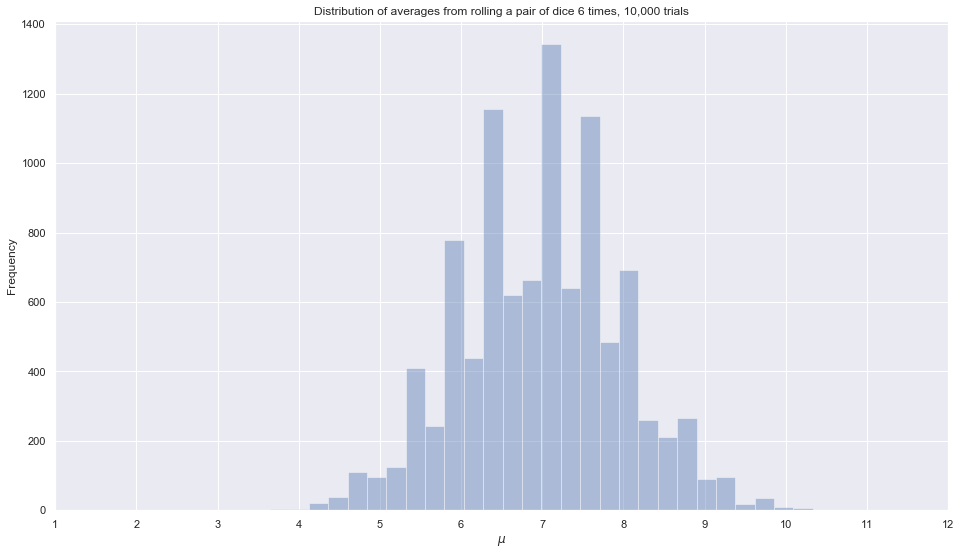

In [13]:
# Calculate the mean of each trial
average = dice.mean(axis=1)

# Extra:
# print("The average of 6 dice rolls in 10,000 trials is {:.2f}".format(
# dice.mean()))

# Answer:
print("It's a Normal Distribution!")

# Chart the mean of each trial as distribution
sns.distplot(average,
             bins=30,
             kde=False)

# Add chart labels to describe the data
plt.title("Distribution of averages from rolling a pair of dice 6 times, 10,000 trials")
plt.xlabel('$\mu$')
plt.ylabel('Frequency')

# Format the x-axis to explicitly show all outcomes
plt.xticks(np.linspace(1, 12, 12));

## 3b.
>What kind of distribution is the underlying random variable (i.e. one dice roll?)
### Rolling a die

In [14]:
# Create two seperate variables:
# One to simulate one die
# One to simulate 10,000 die rolls
die = stats.randint(1, 7)
die_roll = stats.randint(1, 7).rvs(10_000) # Simulate 10,000 die rolls

A Uniform Distribution!


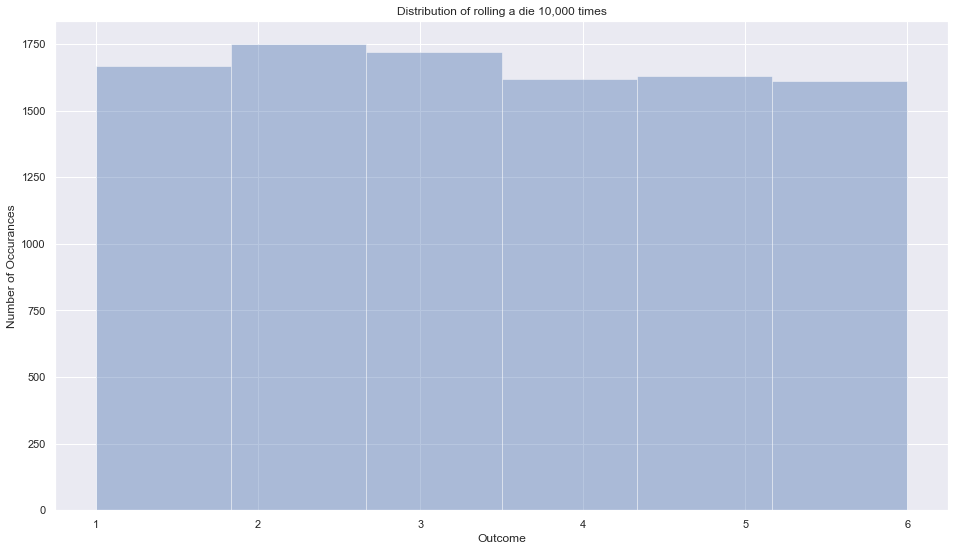

In [15]:
# Plot 10,000 dice rolls in a distribution. Set kde=False to remove kernel density estimate.
sns.distplot(die_roll, bins=6, kde=False)

# Extra:
# print("Expected average value of 10,000 die rolls is {:.3}".format(
# die_roll.mean()))

# Answer:
print("A Uniform Distribution!")

# Chart formatting to describe the data
plt.title('Distribution of rolling a die 10,000 times')
plt.xlabel('Outcome')
plt.ylabel('Number of Occurances');

The discrete values of a die roll have the same probability --- 16.67%
A Uniform Distribution!


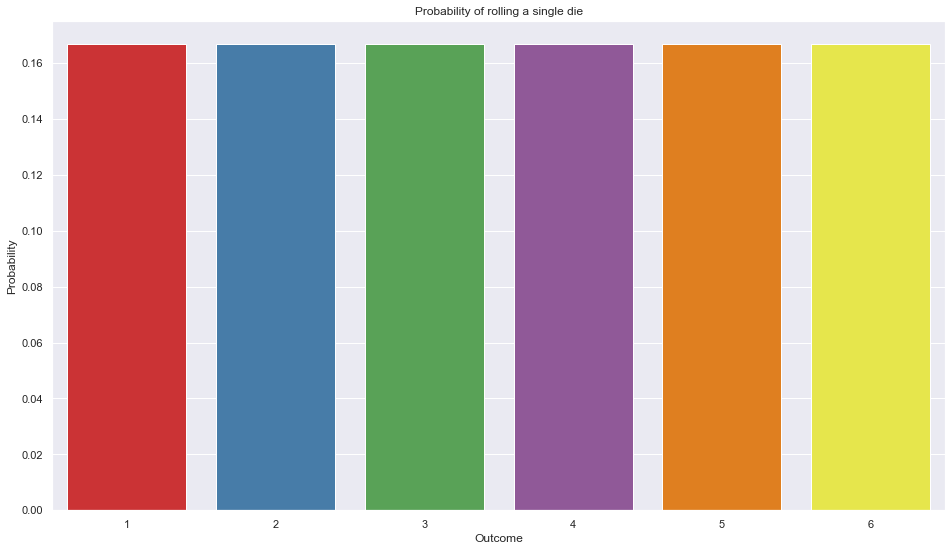

In [16]:
x=np.arange(1, 7)
die_probability = die.pmf(x)

print("The discrete values of a die roll have the same probability --- {:.2%}".format(
    die_probability.mean()
))

print("A Uniform Distribution!")

# Chart formatting
sns.barplot(y=die_probability, x=x, palette="Set1")
plt.title('Probability of rolling a single die')
# plt.grid(axis='y')

plt.xlabel('Outcome')
plt.ylabel('Probability');

# T-Test Exercises

## 1.
Ace Realty wants to determine whether the average time it takes to sell homes is different for _its two offices_.
> A sample of 40 sales from office #1 revealed a `mean` of 90 days and a `standard deviation` of 15 days.

> A sample of 50 sales from office #2 revealed a `mean` of 100 days and a `standard deviation` of 20 days.

> Use a .05 `level of significance`.

### Establish Hypotheses:


$H{0}$: The average time to sell a home is the same for its two offices.

$H{1}$ The average time to sell a home is significantly different for its two offices.

$\alpha$ = 0.05

In [17]:
# The phrase 'average time' == average `rate`. Signal to define a Poisson Distribution
confidence_interval = 0.95
alpha = 1 - confidence_interval

# Office 1 data
o_1sample = 40
o_1mean = 90
o_1stdev = 15

# Office 2 data
o_2sample = 50
o_2mean = 100
o_2stdev = 20

# Model the Poisson Distribution of each office using its mean, standard deviation, and sample size
o_1 = stats.poisson(o_1mean, o_1stdev).rvs(o_1sample)
o_2 = stats.poisson(o_2mean, o_2stdev).rvs(o_2sample)

# When comparing two subgroups of a population, use a Two-Sample T-Test to compare their mean values
# `stats.ttest_ind(Subgroup1_Series_of_continuous_variables, Subgroup2_Series_of_continuous_variables)
t, p = stats.ttest_ind(o_1, o_2)

print("T-Statistic: {:.2f}\nP-Value: {:.2f}\nalpha: {:.2f}\n".format(t, p, alpha))

if p < alpha:
    print("Reject the Null Hypothesis: The average time to sell a home is the SAME for its two offices.")
    print("The average time to sell a home IS significantly different for its two offices.")

T-Statistic: -6.47
P-Value: 0.00
alpha: 0.05

Reject the Null Hypothesis: The average time to sell a home is the SAME for its two offices.
The average time to sell a home IS significantly different for its two offices.


In [18]:
print("Office 1 mean sales:", o_1.mean())
print("Office 2 mean sales:", o_2.mean())
print("\nOffice 1 median sales:", np.median(o_1))
print("Office 2 median sales:", np.median(o_2))

Office 1 mean sales: 106.4
Office 2 mean sales: 121.28

Office 1 median sales: 107.0
Office 2 median sales: 121.0


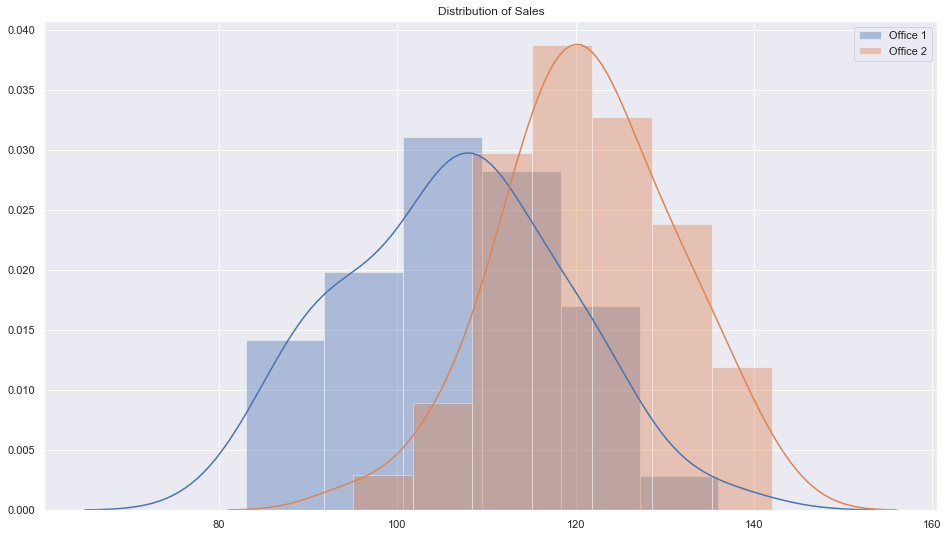

In [19]:
# Distributions of Office 1 and Office 2 Sales
sns.distplot(o_1, label='Office 1')
sns.distplot(o_2, label='Office 2')
plt.title("Distribution of Sales")
plt.legend();

## 2. 
Load the `mpg` dataset and use it to answer the following questions:

> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

\$H_{O}$ There is no difference in fuel-efficiency in cars from 2008 v. 1999.

\$H_{1}$ There is a difference in fuel-efficiency in cars from 2008 v. 1999.

In [10]:
df_mpg = data('mpg')

In [21]:
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
df_mpg['avg_mpg'] = (df_mpg.cty + df_mpg.hwy)/2

# Create subgroups using year as categorical variable
# And average miles per gallon as with continuous data (2008 avg_mpg, 1999 avg_mpg).
cars_1999 = df_mpg[df_mpg.year == 1999].avg_mpg
cars_2008 = df_mpg[df_mpg.year == 2008].avg_mpg

In [23]:
median_mpg_1999 = np.median(cars_1999)
median_mpg_2008 = np.median(cars_2008)

print("1999 Median fuel-efficiency:",median_mpg_1999)
print("2008 Median fuel-efficiency:",median_mpg_2008)

1999 Median fuel-efficiency: 21.0
2008 Median fuel-efficiency: 20.5


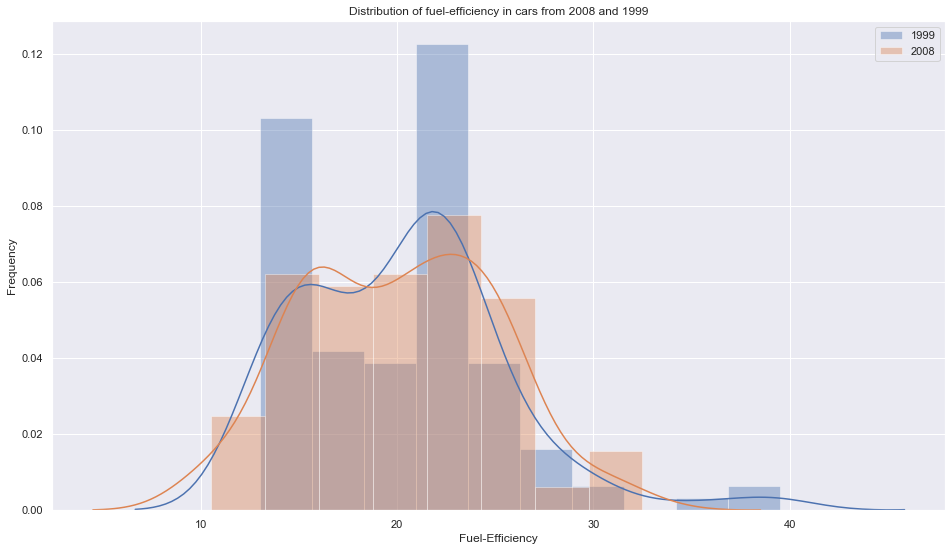

In [24]:
sns.distplot(cars_1999, label='1999')
sns.distplot(cars_2008, label='2008')

plt.title("Distribution of fuel-efficiency in cars from 2008 and 1999")
plt.xlabel("Fuel-Efficiency")
plt.ylabel("Frequency")
plt.legend();

In [25]:
t, p = stats.ttest_ind(cars_1999, cars_2008)

print("T-Statistic: {:.2f}\nP-Value: {:.2f}\nalpha: {:.2f}\n".format(t, p, alpha))

T-Statistic: 0.22
P-Value: 0.83
alpha: 0.05



In [26]:
if p < alpha:
    print('Reject HO. There IS a difference in fuel-efficiency in cars from 2008 and 1999.')
else:
    print('Fail to reject HO. There is NO difference in fuel-efficiency in cars from 2008 and 1999.')

Fail to reject HO. There is NO difference in fuel-efficiency in cars from 2008 and 1999.


> Are compact cars more fuel-efficient than the average car?

In [27]:
# We are comparing a subgroup mean against the mean of the population.
# df_mpg['class'].value_counts()
# ONE SAMPLE T-TEST
pop_mean = df_mpg.avg_mpg.mean()
compact_cars = df_mpg[df_mpg['class'] == 'compact'].avg_mpg

# 1 Sample Ttest
t, p = stats.ttest_1samp(compact_cars, pop_mean)

# Evaluate the significance of the p-value against alpha.
print("T-Statistic: {:.2f}\nP-Value: {:.2f}\nalpha: {:.2f}\n".format(t, p, alpha))

# Determine the appropriate Hypothesis.
if p < alpha:
    print('Reject HO. There IS a difference in fuel-efficiency in compact cars and the average car.')
else:
    print('Fail to reject HO: There is NO difference in fuel-efficiency in compact cars and the average car.')

T-Statistic: 7.90
P-Value: 0.00
alpha: 0.05

Reject HO. There IS a difference in fuel-efficiency in compact cars and the average car.


> Do manual cars get better gas mileage than automatic cars?

In [28]:
# Create a new column of formatted data
df_mpg['trans_class'] = df_mpg['trans'].str.replace('\(.*\)', '')

# Create two series of continuous data from the categorical variable
manual = df_mpg[df_mpg['trans_class'] == 'manual'].avg_mpg
automatic = df_mpg[df_mpg['trans_class'] == 'auto'].avg_mpg

# TWO SAMPLE T-TEST
t, p = stats.ttest_ind(manual, automatic)

# Evaluate the significance of the p-value against alpha.
print("T-Statistic: {:.2f}\nP-Value: {:.2f}\nalpha: {:.2f}\n".format(t, p, alpha))

# Determine the appropriate Hypothesis.
if p < alpha:
    print('Reject HO. Manual cars and automatic cars have different gas mileage.')
else:
    print('Fail to reject HO: Manual cars and automatic cars have the SAME gas mileage.')

T-Statistic: 4.59
P-Value: 0.00
alpha: 0.05

Reject HO. Manual cars and automatic cars have different gas mileage.


# Hypothesis Testing Exercises - Without Numerical Data

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

> Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## 1.
https://www.keycdn.com/support/what-is-latency

### Has the network latency gone up since we switched internet service providers?

__Null Hypothesis__: 

> \$H_{0}$ Internet service providers have no effect on network latency.

__Alternative Hypothesis__:

> \$Ha$ Internet service providers effect network latency.

__True Positive__: Internet service providers _do not_ effect network latency.
> Fail to reject the Null Hypothesis

__False Positive__: Internet service providers _do not_ effect network latency.
> Reject the Null Hypothesis

__Type I__:

> $\alpha$ Reject \$H_{0}$ when Internet service providers __do not__ effect network latency.

__Type II__: 

> $\beta$ Accept \$H_{0}$ when Internet service providers __do__ effect network latency.

## 2.
### Is the website redesign any good?

__Null Hypothesis__: 
> \$H_{0}$ The website redesign has no effect on the number of daily visitors.

__Alternative Hypothesis__:
> \$Ha$ The website redesign increased the number of daily visitors.

__True Positive__: The website redesign has no effect on the number of daily visitors.
> Fail to reject the Null Hypothesis

__False Positive__: The website redesign increased the number of daily visitors.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H_{0}$ when the website redesign has no effect on the number of daily visitors.

__Type II__: 
> $\beta$ Accept \$H_{0}$ when the website redesign increased the number of daily visitors.

## 3.
### Is our television ad driving more sales?

__Null Hypothesis__: 
> \$H_{0}$ The television ad had no effect on sales this month.

__Alternative Hypothesis__:

> \$Ha$ The television ad increased sales this month.

__True Positive__: The television ad had no effect on sales this month.
> Fail to reject the Null Hypothesis

__False Positive__: The television ad increased sales this month.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H_{0}$ when the television ad had no effect on sales this month.

__Type II__: 
>$\beta$ Accept \$H_{0}$ when the television ad increased sales this month.

# Correlation Exercises

__Pearson's Correlation Coefficient__ is used to tell whether two continuous variables have a linear relationship.
* Pearson's correlation only mesasures linear relationships.

Reminders:
- Confounding variable(s) may exist.

    - DO NOT NEGLECT THEM -> Know your data _well_ before measuring correlation.
    - Know your data _well_ before performing __any__ statistical analysis.
        - "Know the data to understand what analysis you can cannot/perform."
        - String may need to be formatted
        - Data may need to be cast as a different data type.
        - Data is like a good fiction book, you can't understand the __purpose__, plot, main characters, emotions/questions/sensory perception, time era, or environment if you don't read the 1st chapter.
            - READ CHAPTER 1!
- Correlation does not mean causation. #Merovingian
- The correlation coefficient, r, only tells that a linear relationship exists. It doesn't tell us the scale, the magnitude of the relationship, _how deep the relationship is_.
    - p_value tells us the magnitude of the linear relationship.

## 1.
Use the `telco_churn` data.

In [29]:
# Use read_excel to load locally saved file.
df_telco = pd.read_excel('telco_churn.xlsx')

In [30]:
# Display the shape of the data
r, c = df_telco.shape

print(r, "x", c, "dataframe\n")
print(r, "records\n", c, "attributes")

7043 x 21 dataframe

7043 records
 21 attributes


In [31]:
# Use `.info` method to get granular detail about each attribute
# I had no idea how powerful `.info` was!
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
# Use `.nunique` method to find the unique values for each column
df_telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [33]:
# df_telco.describe()

# I did not find these useful
# df_telco.describe(include=np.number)
# df_telco.describe(include=np.object)

In [34]:
df_telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Initial findings:
- The dataset is from a telecommunications company
- There are 7043 unique customers
- Data on each customer: Customer demographics, tenure, services, support, contracts, payment methods, charges, churn

- 21 Attributes (data points) for each customer
    - 4 numeric attributes
        * SeniorCitizen - int 64 | Customer's age
        * tenure - int64 | Time as a customer
        * MonthlyCharges - float64 | Monetary values
        * TotalCharges - float64 | Monetary values
    - 17 categorical attributes
- __11 null values in "TotalCharges" column__ <- Gotta clean `.fillna(0)`

## 1a.
> Does `tenure` correlate with `monthly charges`?

### Step 1. Establish Hypotheses
1. Setup Pearson's Correlation (\$r$) Coefficient Hypothesis Test
2. Set Confidence Interval
3. Calculate alpha.

#### 1. Setup Hypothesis for Pearson's Correlation Coefficient - r
Null Hypothesis \$H_{0}$: 

> There is no linear relationship between tenure and monthly charges.

Alternative Hypothesis \$Ha$:

> There is a linear relationship between tenure and monthly charges.

#### 2. Set Confidence Interval

In [6]:
confidence_interval = .95

#### 3. Calculate alpha

In [7]:
alpha = 1 - confidence_interval

### Step 2. Statistical Analysis

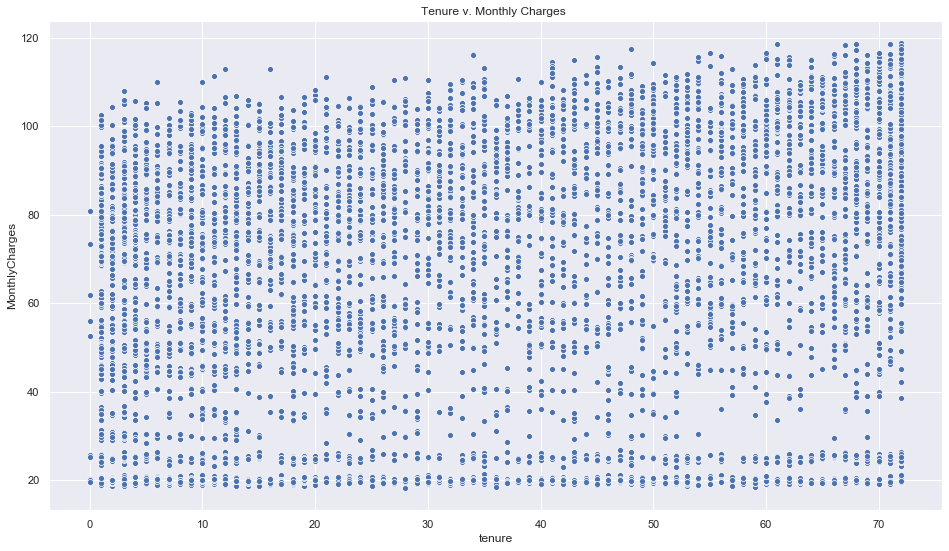

In [37]:
# Plot the datapoints on a regression plot
sns.scatterplot(y='MonthlyCharges',
                x='tenure',
                data=df_telco
               )
plt.title('Tenure v. Monthly Charges ');

### Step 3. Determine the appropriate hypothesis

In [38]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.MonthlyCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(r, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and monthly charges.')
else:
    print('Fail to reject HO. There is no linear' \
          'relationship between tenure and monthly charges.')

Pearsons Correlation Coefficient: 0.25
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and monthly charges.


## 1b.
> `Total charges`?

In [39]:
# Clean the data: 11 missing values.
df_telco["TotalCharges"] = df_telco.TotalCharges.fillna(0)  #  Fill with zero's

#### Step 1.
1. Setup Pearson's Correlation Coefficient Hypothesis Test - \$r$
2. Set Confidence Interval
3. Calculate alpha.

##### 1. Setup Hypothesis for Pearson's Correlation Coefficient - \$r$

Null Hypothesis \$H_{0}$:

> There is no linear relationship between tenure and total charges.

Alternative Hypothesis \$Ha$:

> There is a linear relationship between tenure and total charges.


##### 2. Set Confidence Interval
`*Setting each time for ` __`repetition`__

In [40]:
confidence_interval = .95

##### 3. Set alpha
`*Setting each time for ` __`repetition`__

In [41]:
alpha = 1 - confidence_interval

#### Step 2. Statistical Analysis

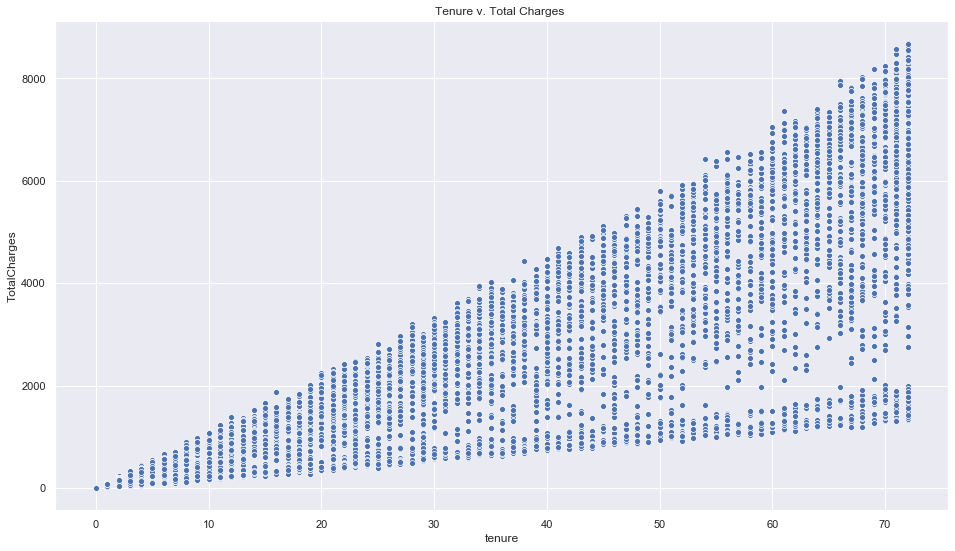

In [42]:
# Plot tenure and total charges
sns.scatterplot(x='tenure',
                y='TotalCharges',
                data=df_telco
               )

plt.title('Tenure v. Total Charges ');

#### Step 3. Determine the appropriate Hypothesis

In [43]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.MonthlyCharges)
print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and total charges.')
else:
    print('Fail to reject HO. There is no linear' \
          'relationship between tenure and total charges.')

Pearsons Correlation Coefficient: 0.25
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and total charges.


## 1c.
> What happens if you __control__ for `phone and internet service`?

### Phone Only Correlations

In [44]:
# Create a filtered dataframe of phone only customers
phone_only = df_telco[df_telco['InternetService'] == 'No']

#### Step 1.
1. Setup Pearson's Correlation Coefficient Hypothesis Test - \$r$
2. Set Confidence Interval
3. Calculate alpha.

##### 1. Setup Hypothesis for Pearson's Correlation Coefficient - \$r$

Null Hypothesis \$H_{0}$:

> There is no linear relationship between  tenure and total charges.

Alternative Hypothesis \$Ha$:

> There is a linear relationship between tenure and total charges.


##### 2. Set Confidence Interval
`*Setting each time for ` __`repetition`__

In [45]:
confidence_interval = 0.95

##### 3. Calculate alpha

In [46]:
alpha = 1 - confidence_interval

#### Step 2. Statistical Analysis

##### Phone Only - Correlation of Tenure and Monthly Charges

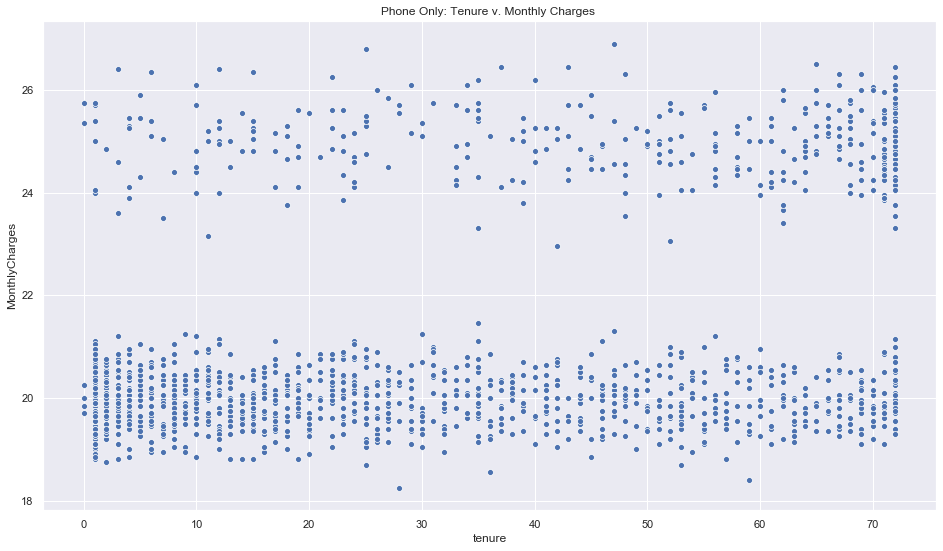

In [155]:
# Plot 'Phone Only' tenure and monthly charges.
sns.scatterplot(x='tenure',
                y='MonthlyCharges',
                data=phone_only
               )
plt.title('Phone Only: Tenure v. Monthly Charges ');

In [156]:
r, p = stats.pearsonr(phone_only.tenure, phone_only.MonthlyCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and monthly charges for Phone Only customers.')
else:
    print('Fail to reject HO. There is no linear' \
          'relationship between tenure and monthly charges for Phone Only customers.')

Pearsons Correlation Coefficient: 0.34
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and monthly charges for Phone Only customers.


##### Phone Only - Correlation of Tenure and Total Charges

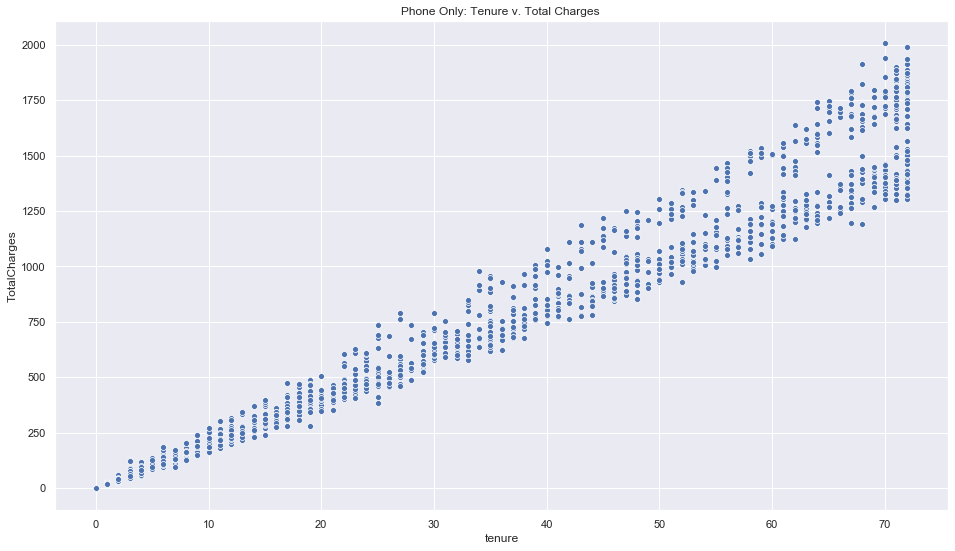

In [157]:
# Plot 'Phone Only' tenure and total charges.
sns.scatterplot(x='tenure',
                y='TotalCharges',
                data=phone_only
                )
plt.title('Phone Only: Tenure v. Total Charges ');

In [158]:
r, p = stats.pearsonr(phone_only.tenure, phone_only.TotalCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and monthly charges for Phone Only customers.')
else:
    print('Fail to reject HO. There is no linear' \
          'relationship between tenure and monthly charges for Phone Only customers.')

Pearsons Correlation Coefficient: 0.98
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and monthly charges for Phone Only customers.


### Internet Only Correlations

In [159]:
# Create filtered dataframe of 'Internet Only' customers
internet_only = df_telco[(df_telco['InternetService'] != 'No')
                         & (df_telco['PhoneService'] == 'No')]

In [160]:
# There is only one standalone internet package - DSL
internet_only.InternetService.value_counts()

DSL    682
Name: InternetService, dtype: int64

##### Internet Only - Correlation of Tenure and Monthly Charges

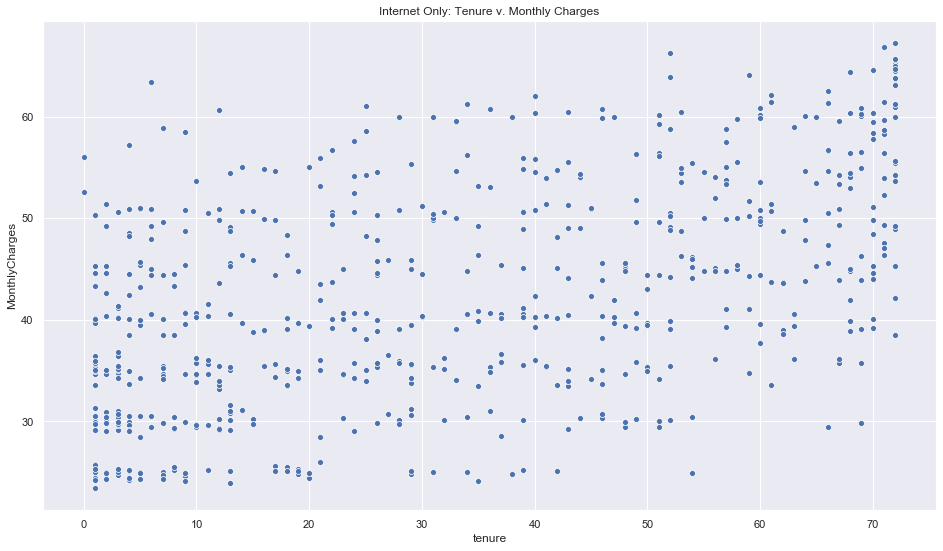

In [161]:
#Plot Internet Only tenure and monthly charges
sns.scatterplot(x='tenure',
                y='MonthlyCharges',
                data=internet_only
                )
plt.title('Internet Only: Tenure v. Monthly Charges');

In [162]:
r, p = stats.pearsonr(internet_only.tenure, internet_only.MonthlyCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and monthly charges for Internet Only customers.')
else:
    print('Fail to reject HO. There is no linear' \
          'relationship between tenure and monthly charges for Internet Only customers.')

Pearsons Correlation Coefficient: 0.59
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and monthly charges for Internet Only customers.


##### Internet Only - Correlation of Tenure and Total Charges

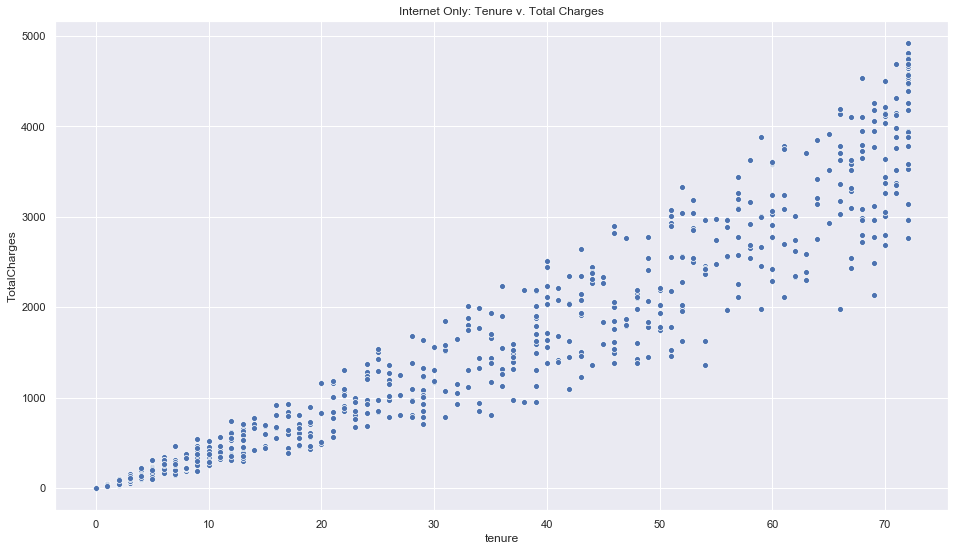

In [163]:
#Plot Internet Only tenure and monthly charges
sns.scatterplot(x='tenure',
                y='TotalCharges',
                data=internet_only
                )
plt.title('Internet Only: Tenure v. Total Charges');

In [164]:
r, p = stats.pearsonr(internet_only.tenure, internet_only.TotalCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and total charges for Internet Only customers.')
else:
    print('Fail to reject HO. There is no linear' \
          'relationship between tenure and total charges for Internet Only customers.')

Pearsons Correlation Coefficient: 0.95
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and total charges for Internet Only customers.


### Phone and Internet Correlations

In [165]:
# Phone and Internet Only Customers
bundled = df_telco[
    (df_telco['PhoneService'] == 'Yes')
    &(df_telco['InternetService'] != 'No')
]

In [166]:
# Ensuring both columns are filtered correctly
# bundled_telco.PhoneService.value_counts()
# bundled_telco.InternetService.value_counts()

##### Phone & Internet - Correlation of Tenure and Monthly Charges

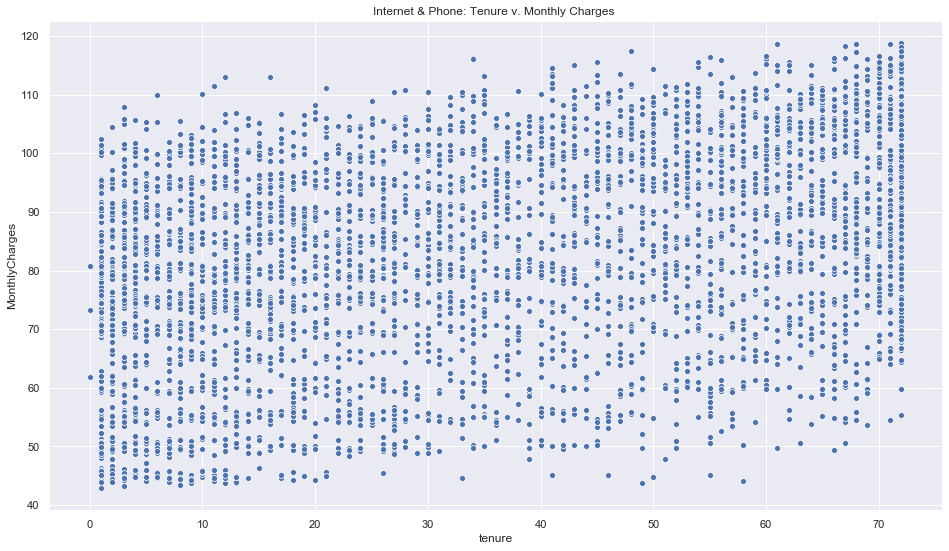

In [167]:
# Scatterplot of Phone and Internet: Tenure v. Monthly Chages
sns.scatterplot(x='tenure',
                y='MonthlyCharges',
                data=bundled
               )
plt.title('Internet & Phone: Tenure v. Monthly Charges ');

In [168]:
r, p = stats.pearsonr(bundled.tenure, bundled.MonthlyCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and monthly' \
          ' charges for Phone & Internet customers.')
else:
    print('Fail to reject HO. There is no linear' \
          ' relationship between tenure and monthly' \
          ' charges for Phone & Internet customers.')

Pearsons Correlation Coefficient: 0.44
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and monthly charges for Phone & Internet customers.


##### Phone & Internet - Correlation of Tenure and Total Charges

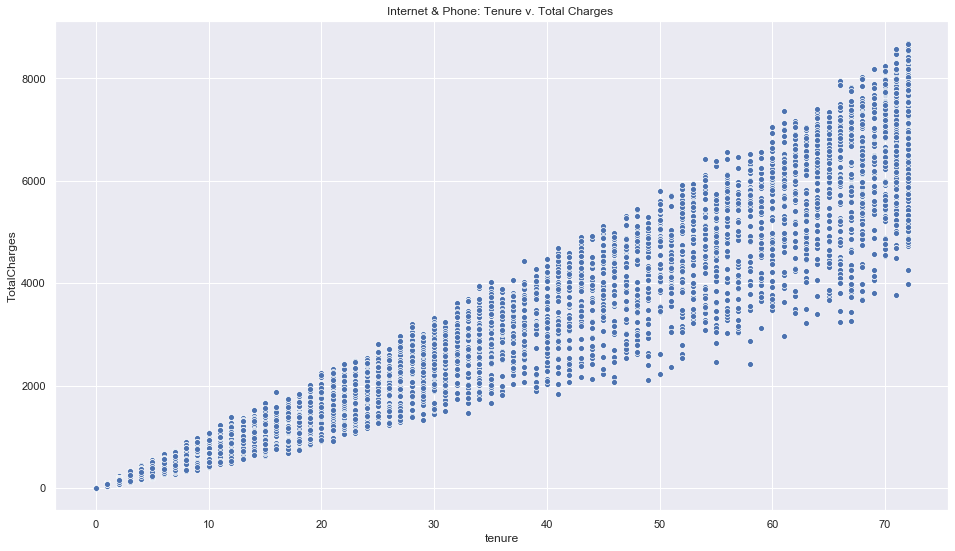

In [169]:
# Scatterplot of Phone and Internet: Tenure v. Monthly Chages
sns.scatterplot(x='tenure',
                y='TotalCharges',
                data=bundled
               )
plt.title('Internet & Phone: Tenure v. Total Charges ');

In [170]:
r, p = stats.pearsonr(bundled.tenure, bundled.TotalCharges)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and total' \
          ' charges for Phone & Internet customers.')
else:
    print('Fail to reject HO. There is no linear' \
          ' relationship between tenure and total' \
          ' charges for Phone & Internet customers.')

Pearsons Correlation Coefficient: 0.96
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and total charges for Phone & Internet customers.


## 2.
Use the `employees` database.

In [83]:
df_emp = pd.read_csv('employees_salaries.csv')

In [64]:
# df_emp.info()

In [84]:
from datetime import timedelta

In [66]:
df_emp.head()

,Unnamed: 0,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,emp_no.1,title,from_date.1,to_date.1
0,0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,10001,Senior Engineer,1986-06-26,9999-01-01
2,2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,10001,Senior Engineer,1986-06-26,9999-01-01
3,3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,10001,Senior Engineer,1986-06-26,9999-01-01
4,4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,10001,Senior Engineer,1986-06-26,9999-01-01


In [98]:
# Find the most recent title change and use that as the max date
max_year = pd.to_datetime(df_emp['from_date.1'].max()).date() + timedelta(days=(365*2))  # Add two years

In [99]:
max_year

datetime.date(2004, 7, 31)

In [100]:
df_emp['from_date'] = pd.to_datetime(df_emp['from_date']).dt.date
df_emp['from_date.1'] = pd.to_datetime(df_emp['from_date.1']).dt.date

In [101]:
df_emp['to_date'] = df_emp['to_date'].replace('9999-01-01', max_year)
df_emp['to_date.1'] = df_emp['to_date.1'].replace('9999-01-01', max_year)

In [102]:
# Yay it works!
# df_emp.from_date[0]

In [103]:
df_emp['to_date'] = pd.to_datetime(df_emp['to_date']).dt.date
df_emp['to_date.1'] = pd.to_datetime(df_emp['to_date.1']).dt.date

In [174]:
aggs = {'from_date': 'min',
        'to_date': 'max',
        'salary': 'max',
        'title': 'nunique'}

In [120]:
df_emp_tenure_salary = pd.DataFrame(
    df_emp.groupby('emp_no')[['from_date',
                              'to_date',
                              'salary',
                              'title']].agg(aggs))

In [145]:
df_emp_tenure_salary['tenure'] = (df_emp_tenure_salary.to_date
                                 - df_emp_tenure_salary.from_date
                                 ).dt.days / 30.4

In [146]:
df_emp_tenure_salary.head()

,from_date,to_date,salary,title,tenure
emp_no,,,,,
10001,1986-06-26,2004-07-31,88958,1,217.434211
10002,1996-08-03,2004-07-31,72527,1,96.019737
10003,1995-12-03,2004-07-31,43699,1,104.046053
10004,1986-12-01,2004-07-31,74057,2,212.236842
10005,1989-09-12,2004-07-31,94692,2,178.815789


## 2a.
> Is there a relationship between how long an employee has been with the company and their `salary`?

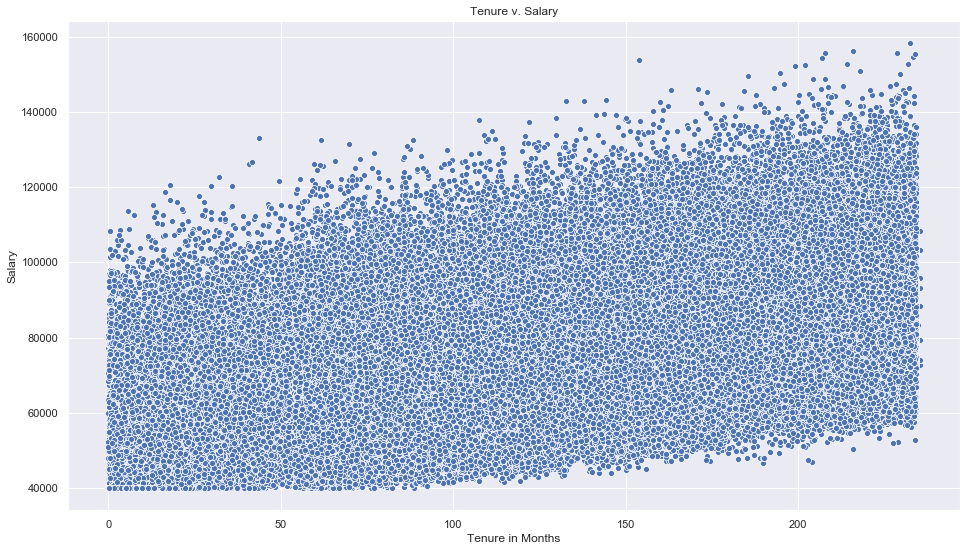

In [171]:
sns.scatterplot(y='salary',
                x='tenure',
                data=df_emp_tenure_salary
               )
plt.title('Tenure v. Salary')
plt.xlabel('Tenure in Months')
plt.ylabel('Salary');

In [148]:
r, p = stats.pearsonr(df_emp_tenure_salary.tenure, df_emp_tenure_salary.salary)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and salary.')
else:
    print('Fail to reject HO. There is no linear' \
          ' relationship between tenure and salary.')

Pearsons Correlation Coefficient: 0.53
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and salary.


## 2b.
> Is there a relationship between how long an employee has been with the company and the number of `titles` they have had?

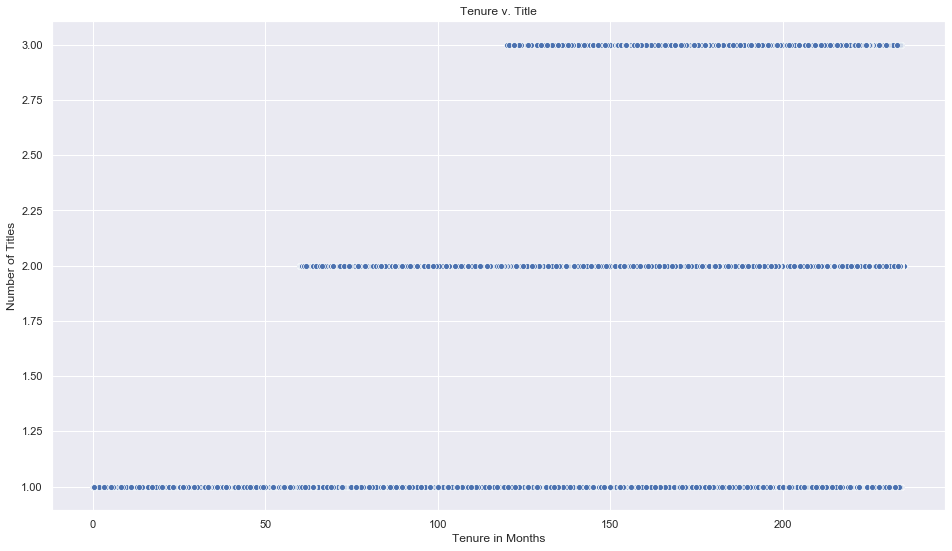

In [150]:
sns.scatterplot(y='title',
                x='tenure',
                data=df_emp_tenure_salary
               )
plt.title('Tenure v. Title')
plt.xlabel('Tenure in Months')
plt.ylabel('Number of Titles');

In [141]:
r, p = stats.pearsonr(df_emp_tenure_salary.tenure, df_emp_tenure_salary.title)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between tenure and title.')
else:
    print('Fail to reject HO. There is no linear' \
          ' relationship between tenure and title.')

Pearsons Correlation Coefficient: 0.59
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between tenure and title.


## 3.
Use the `sleepstudy` data. Is there a relationship between `days` and `reaction time`?

In [176]:
df_sleepstudy = data('sleepstudy')

In [178]:
df_sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


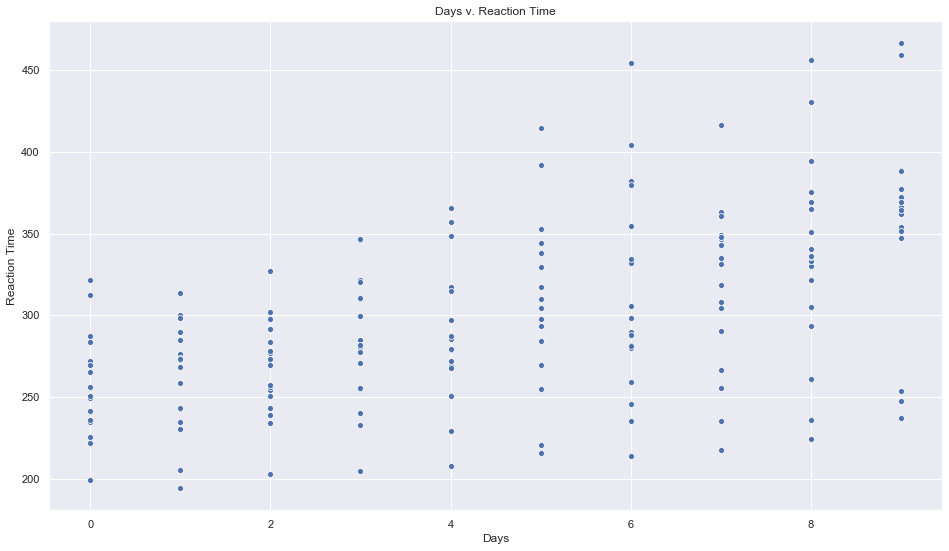

In [179]:
sns.scatterplot(y='Reaction',
                x='Days',
                data=df_sleepstudy
               )
plt.title('Days v. Reaction Time')
plt.xlabel('Days')
plt.ylabel('Reaction Time');

In [182]:
r, p = stats.pearsonr(df_sleepstudy.Days, df_sleepstudy.Reaction)

print(("Pearsons Correlation Coefficient: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(r, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a linear' \
          ' relationship between Days and Reaction time.')
else:
    print('Fail to reject HO. There is no linear' \
          ' relationship between Days and Reaction time.')

Pearsons Correlation Coefficient: 0.54
P-Value: 0.0000000000
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a linear relationship between Days and Reaction time.


# Chi-Squared Exercises

## 1.
> Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [3]:
index = ['Uses a Macbook', "Doesn't Use a Macbook"]
cols = ['Codeup', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20],
                         [1, 30]],
                        index=index,
                        columns=cols
                       )

In [9]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(("Chi2: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(chi2, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). Using a Macbook' \
          ' and being a Codeup student are dependent.')
else:
    print('Fail to reject HO. Using a Macbook' \
          ' and being a Codeup student are not dependent.')

Chi2: 36.65
P-Value: 0.0000000014
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). Using a Macbook and being a Codeup student are dependent.


## 2.
> Choose another 2 categorical variables from the `mpg` dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [33]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [12]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  avg_mpg       234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [13]:
df_mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
avg_mpg         40
dtype: int64

In [26]:
df_mpg.fl.value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

Null Hypothesis \$H_{0}$: 

> Transmission type and fuel-efficiency are independent.

Alternative Hypothesis \$Ha$:

> Transmission type and fuel-efficiency are dependent.

In [27]:
observed_trans = pd.crosstab(df_mpg.trans, df_mpg.fl)

In [28]:
observed_trans

fl,c,d,e,p,r
trans,,,,,
auto(av),0,0,0,4,1
auto(l3),0,0,0,0,2
auto(l4),0,2,3,6,72
auto(l5),1,1,4,9,24
auto(l6),0,0,0,0,6
auto(s4),0,0,0,2,1
auto(s5),0,0,0,1,2
auto(s6),0,0,0,9,7
manual(m5),0,2,0,9,47


In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed_trans)

print(("Chi2: {:.2f}" \
      "\nP-Value: {:.10f}\nalpha: {:.2f}\n").format(chi2, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). Transmission' \
          ' and fuel type class are dependent.')
else:
    print('Fail to reject HO. Transmission' \
          ' and fuel type are independent.')

Chi2: 73.03
P-Value: 0.0002564593
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). Transmission and fuel type class are dependent.


## 3.
Use the data from the `employees` database to answer these questions:
## 3a.
> Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [41]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [ ]:
df_cur_emp = pd.read_sql("""
select *
from employees
join dept_emp using emp_no
join departments using emp_no
""",
url)

## 3b.
> Is an employee's gender independent of whether or not they are or have been a manager?